In [524]:
import os
import numpy as np
import pandas as pd
import glob
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
sns.set()

In [335]:
listdates = glob.glob('20*.jpg')

In [336]:
listdates.remove('2015-08-09-02.jpg')

In [337]:
len(listdates)

168

In [338]:
name = []
for i, _ in enumerate(listdates):
    name += [os.path.splitext(listdates[i])[0]]
name[name.index('2015-08-09-01')] = '2015-08-09'

In [339]:
with open('YAAL_dates.csv','w') as YAAL:
    for i in name:
        YAAL.write(i+'\n')

In [340]:
data = pd.read_csv('YAAL_dates.csv', parse_dates=True, infer_datetime_format=True, index_col=0,  header = 0, names=['date'])

In [341]:
data = data.sort_index()

In [168]:
data.index[0]

Timestamp('2014-06-08 00:00:00')

In [342]:
weekday = []
for i,_ in enumerate(data.index):
    weekday += [data.index[i].weekday()]

In [343]:
data['weekday'] = weekday

In [346]:
data.loc[data['weekday']!=6]

,weekday
date,


In [347]:
dados20140518_20180826 = data

In [385]:
teste = pd.date_range(start='2014-05-18',end='2018-08-26',freq='W')

In [569]:
#teste.strftime('%B')

In [419]:
todososdomingos20140518_20180826 = pd.date_range(start='2014-05-18',end='2018-08-26',freq='W')

In [420]:
len(todososdomingos20140518_20180826) - len(dados20140518_20180826)

57

In [421]:
todososdomingos20140518_20180826 = pd.DataFrame(np.array(todososdomingos20140518_20180826), columns=['date'])

In [353]:
todososdomingos20140518_20180826.index = todososdomingos20140518_20180826['date']
todososdomingos20140518_20180826 = todososdomingos20140518_20180826.drop('date', axis=1)

In [356]:
month = []
for i,_ in enumerate(dados20140518_20180826.index):
    month += [dados20140518_20180826.index[i].month]
dados20140518_20180826.index[0].month
len(dados20140518_20180826)

167

In [422]:
month = []
for ide,_ in enumerate(todososdomingos20140518_20180826['date']):
    month += [todososdomingos20140518_20180826['date'][ide].month]
todososdomingos20140518_20180826['month'] = month
len(todososdomingos20140518_20180826)

224

In [360]:
#todososdomingosnov205_aug2018.loc[todososdomingosnov205_aug2018['ocorreu'] == False]['ocorreu']

In [423]:
ocorreu = []
for i,_ in enumerate(todososdomingos20140518_20180826['date']):
    ocorreu += [a todososdomingos20140518_20180826['date'][i] in dados20140518_20180826.index]
todososdomingos20140518_20180826['ocorreu'] = ocorreu

In [675]:
dados = todososdomingos20140518_20180826.drop(['ocorreunum','month'],axis=1)
dados.iloc[:,0:2].to_csv('YAAL_data.csv')

In [644]:
#todososdomingos20140518_20180826['ocorreunum'] = 1 if (todososdomingos20140518_20180826['ocorreu'] == True) else 0
#todososdomingos20140518_20180826.loc[todososdomingos20140518_20180826['ocorreu'] == False]['ocorreunum']=0
falseMonthOccur = todososdomingos20140518_20180826[todososdomingos20140518_20180826['ocorreu']==False].groupby(todososdomingos20140518_20180826['date'].dt.strftime('%B')).count()['ocorreu']
trueMonthOccur = todososdomingos20140518_20180826[todososdomingos20140518_20180826['ocorreu']==True].groupby(todososdomingos20140518_20180826['date'].dt.strftime('%B')).count()['ocorreu']
allMonthOccur = todososdomingos20140518_20180826.groupby(todososdomingos20140518_20180826['date'].dt.strftime('%B')).count()['ocorreu']

monthBarDf = pd.DataFrame(100*falseMonthOccur.astype(float)/allMonthOccur.astype(float))

monthBarDf['naoocorreu'] = 100*trueMonthOccur.astype(float)/allMonthOccur.astype(float)
monthBarDf.rename(index=str, columns={"ocorreu":"naoocorreu","naoocorreu":"ocorreu"},inplace=True)
monthBarDf = monthBarDf.sort_values('naoocorreu',ascending=True)
#monthBarDf
#falseMonthOccur.astype(float)/allMonthOccur.astype(float)

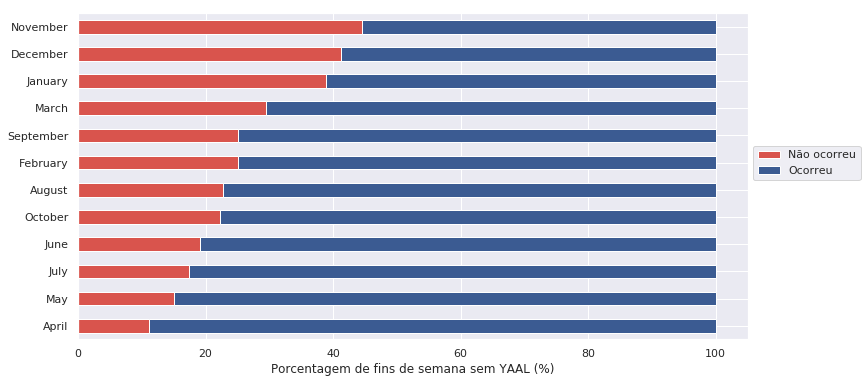

In [659]:
monthBarDf.plot(kind='barh', color=[sns.xkcd_rgb["pale red"],sns.xkcd_rgb["denim blue"]],stacked=True,figsize=(12,6))
plt.ylabel('')
#plt.xlim((0,60))
plt.xlabel('Porcentagem de fins de semana sem YAAL (%)')
plt.legend(['Não ocorreu','Ocorreu'],bbox_to_anchor=(1.0, 0.61))
plt.show()

In [514]:
monthBarDfDisp = pd.DataFrame(100*monthBarDf).style.format({'ocorreu': '{:.2f}%'.format})

In [618]:
#pd.DataFrame(monthBarDf).index

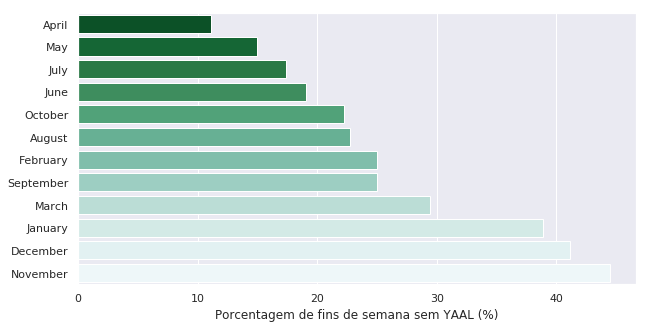

In [663]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='naoocorreu',y=pd.DataFrame(monthBarDf).index,data=pd.DataFrame(monthBarDf), palette="BuGn_r")
plt.ylabel('')
plt.xlabel('Porcentagem de fins de semana sem YAAL (%)')
plt.show()

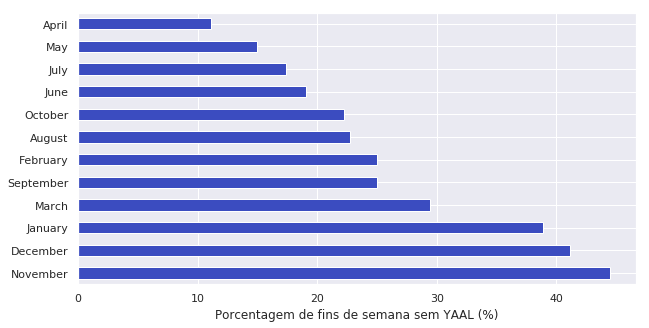

In [570]:
monthBarDf.plot(kind='barh',sort_columns = False, colormap = 'coolwarm',  figsize=(10,5))
plt.ylabel('')
plt.xlabel('Porcentagem de fins de semana sem YAAL (%)')
#ax = sns.barplot("size", y="total_bill", palette="Blues_d")
plt.show()

In [540]:
falseYearOccur = todososdomingos20140518_20180826[todososdomingos20140518_20180826['ocorreu']==False].groupby(todososdomingos20140518_20180826['date'].dt.strftime('%Y')).count()['ocorreu']
allYearOccur = todososdomingos20140518_20180826.groupby(todososdomingos20140518_20180826['date'].dt.strftime('%Y')).count()['ocorreu']
YearBarDf = (falseYearOccur.astype(float) / allYearOccur.astype(float))*100
YearBarDf = YearBarDf.sort_values()

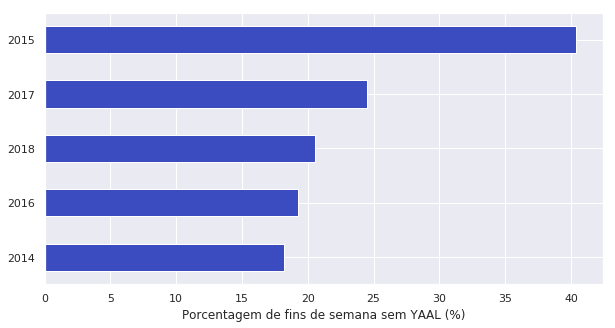

In [541]:
YearBarDf.plot.barh(sort_columns = False, colormap = 'coolwarm', figsize=(10,5))
plt.ylabel('')
plt.xlabel('Porcentagem de fins de semana sem YAAL (%)')
plt.show()

In [416]:
#listmonthsname = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
#listmonths = list(range(1,13))
#.plot.hist('month',  figsize=(10,5), bins=12)
#plt.xticks(listmonths,listmonthsname, va='center')
#plt.show()

In [488]:
#pd.options.display.float_format = '{:.2f}%'.format

In [687]:
data2 = pd.read_csv('YAAL_data.csv', parse_dates = True, infer_datetime_format=True, index_col=0)

In [688]:
data2['date'] = pd.to_datetime(data2['date'], format="%Y-%m-%d")

In [689]:
data2

,date,ocorreu,pessoas,homens,mulheres,local
0,2014-05-18,True,0.000000,0,0,primeiro
1,2014-05-25,True,0.000000,0,0,primeiro
2,2014-06-01,True,0.000000,0,0,primeiro
3,2014-06-08,True,0.000000,0,0,primeiro
4,2014-06-15,True,0.000000,0,0,NaN
5,2014-06-22,True,0.000000,0,0,NaN
6,2014-06-29,True,0.000000,0,0,NaN
7,2014-07-06,True,0.000000,0,0,NaN
8,2014-07-13,True,0.000000,0,0,NaN
9,2014-07-20,True,0.000000,0,0,NaN


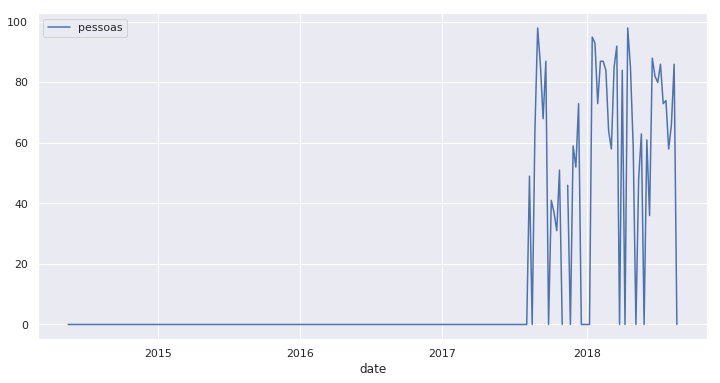

In [692]:
data2.plot(kind='line',x='date',y='pessoas', figsize=(12,6))